In [115]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date

In [116]:
BTC = yf.Ticker("BTC-USD")
BTC = BTC.history(period="max")

In [117]:
df_all = BTC["Close"]
df_all.index = pd.to_datetime(df_all.index).normalize()
df_all.index.strftime('%Y-%m-%d')
df = df_all.loc["2020":"2023-12-31"]

In [119]:
df.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 1461 entries, 2020-01-01 00:00:00+00:00 to 2023-12-31 00:00:00+00:00
Freq: D
Series name: Close
Non-Null Count  Dtype  
--------------  -----  
1461 non-null   float64
dtypes: float64(1)
memory usage: 22.8 KB


In [120]:
df.describe()

count     1461.000000
mean     28890.454091
std      15114.075467
min       4970.788086
25%      16967.132812
50%      27307.437500
75%      39773.828125
max      67566.828125
Name: Close, dtype: float64

In [121]:
df.tail(2)

Date
2023-12-30 00:00:00+00:00    42156.902344
2023-12-31 00:00:00+00:00    42265.187500
Freq: D, Name: Close, dtype: float64

In [122]:
def graficar_serie(df, nombre='Precio Cierre BTC (2020-2024)'):
    plt.figure(figsize=(9, 5))
    df.plot(ax=plt.gca(), legend=False)  # si df es una Serie
    media = df.mean().item() if isinstance(df, pd.DataFrame) else df.mean()
    plt.axhline(y=media, color='red', linestyle='--', linewidth=1.5, label='Promedio')
    plt.title(nombre)
    plt.xlabel('Fecha')
    plt.ylabel('Precio USD')
    plt.tight_layout()
    plt.show()

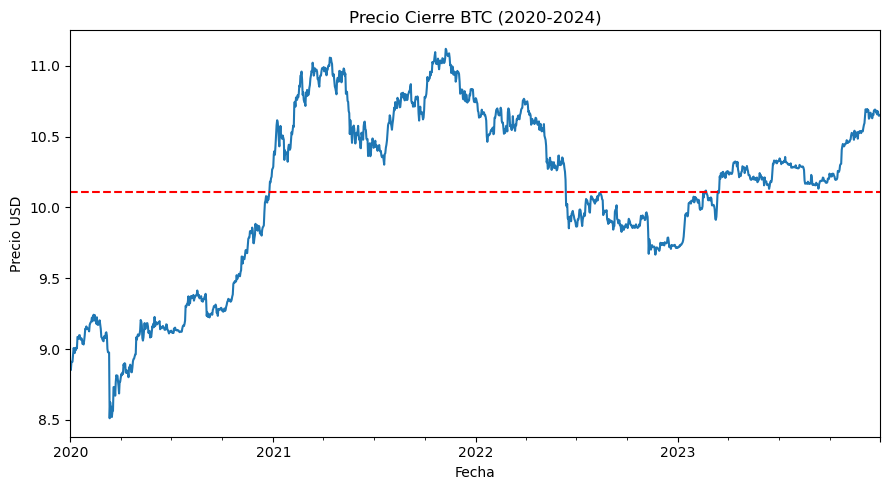

In [192]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='box-cox', standardize=False)
df_BC = pt.fit_transform(df.values.reshape(-1, 1))

graficar_serie(np.log(df))

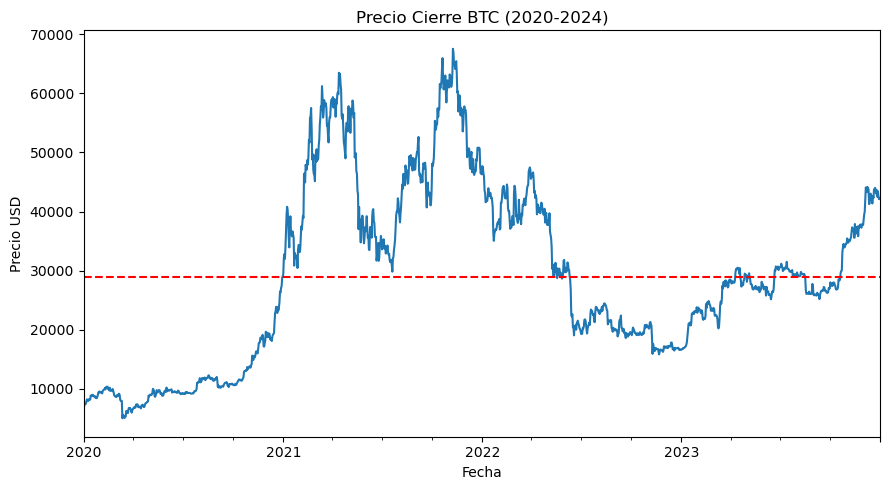

In [123]:
graficar_serie(df)


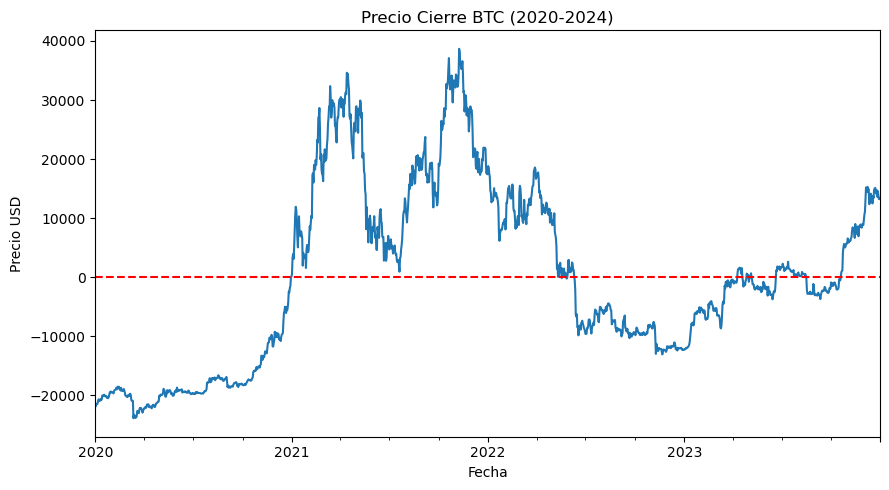

In [124]:
df_cent = df - df.mean()
graficar_serie(df_cent)


In [129]:
data={'DF':[float(df.mean()),float(df.std())],
    'Df Centrado':[float(df_cent.mean()),float(df_cent.std())]}
data

{'DF': [28890.45409086777, 15114.075467472767],
 'Df Centrado': [-1.4342750122414967e-12, 15114.075467472767]}

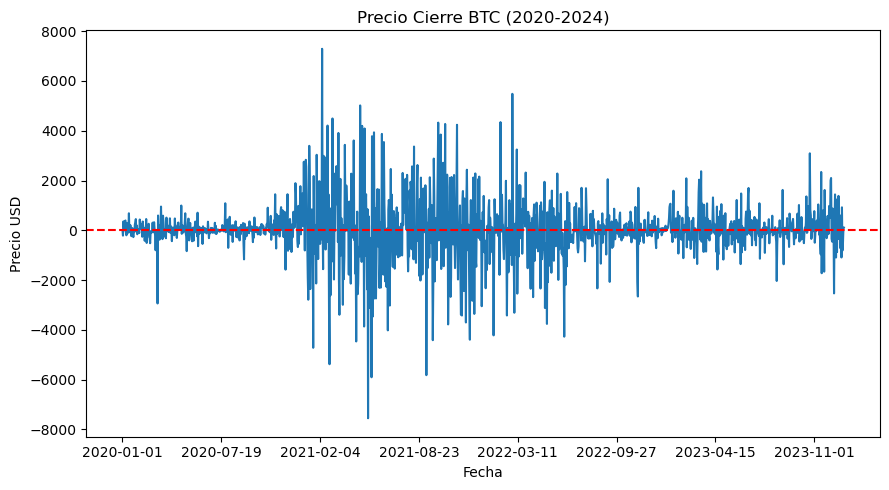

In [141]:
df_dif = df_all.diff().loc["2020":"2024"]
df_dif
graficar_serie(df_dif)

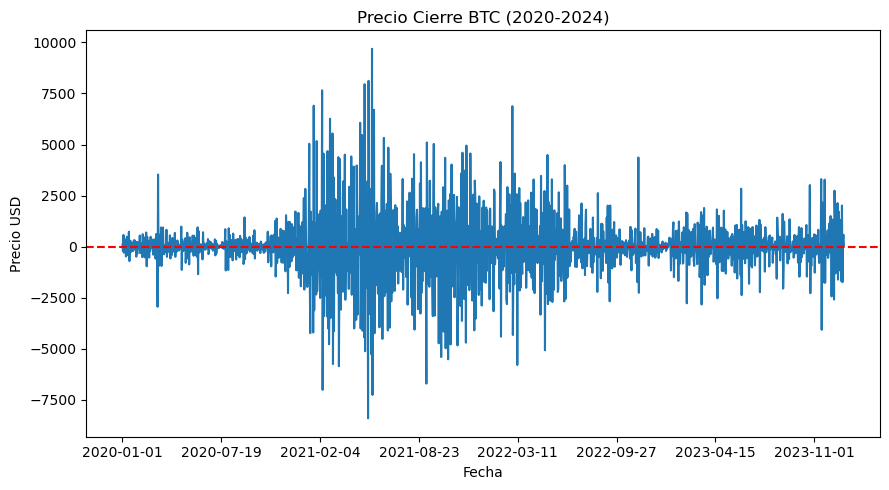

In [142]:
df_dif_2 = df_all.diff().diff().loc["2020":"2024"]
graficar_serie(df_dif_2)

In [197]:
def diferenciar(serie, diferencias):
    df_dif_temp = serie
    for _ in range(diferencias-1):
        df_dif_temp = df_dif_temp.diff()
    return(df_dif_temp.loc["2020":"2024"])

In [199]:
df_diff_9 = diferenciar(df_all,0)
df_diff_9
# df_all.diff().diff()["2020":"2024"]

Date
2020-01-01     7200.174316
2020-01-02     6985.470215
2020-01-03     7344.884277
2020-01-04     7410.656738
2020-01-05     7411.317383
                  ...     
2023-12-27    43442.855469
2023-12-28    42627.855469
2023-12-29    42099.402344
2023-12-30    42156.902344
2023-12-31    42265.187500
Name: Close, Length: 1461, dtype: float64

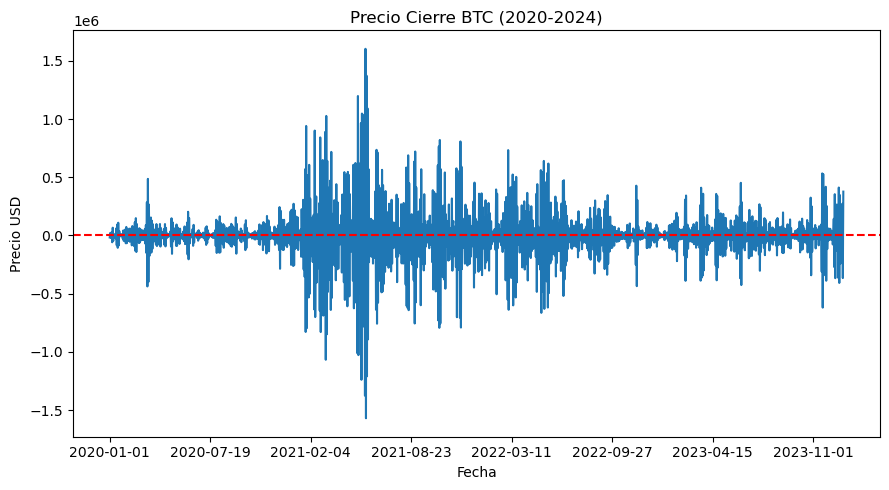

In [ ]:
graficar_serie(df_diff_9)

In [202]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
def graficar_fac_facp(serie, lags=30, titulo='FAC y FACP'):
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # FAC (ACF) - excluyendo lag 0
    plot_acf(serie.dropna(), ax=axes[0], lags=lags, zero=False)
    axes[0].set_title('FAC (Autocorrelación)')
    
    # Ajustar escala Y para FAC
    y_min, y_max = axes[0].get_ylim()
    margin = (y_max - y_min) * 0.1  # 10% de margen
    axes[0].set_ylim(y_min - margin, y_max + margin)

    # FACP (PACF) - por defecto no incluye lag 0
    plot_pacf(serie.dropna(), ax=axes[1], lags=lags, method='yw')
    axes[1].set_title('FACP (Autocorrelación Parcial)')
    
    # Ajustar escala Y para FACP
    y_min, y_max = axes[1].get_ylim()
    margin = (y_max - y_min) * 0.1  # 10% de margen
    axes[1].set_ylim(y_min - margin, y_max + margin)

    plt.suptitle(titulo)
    plt.tight_layout()
    plt.show()


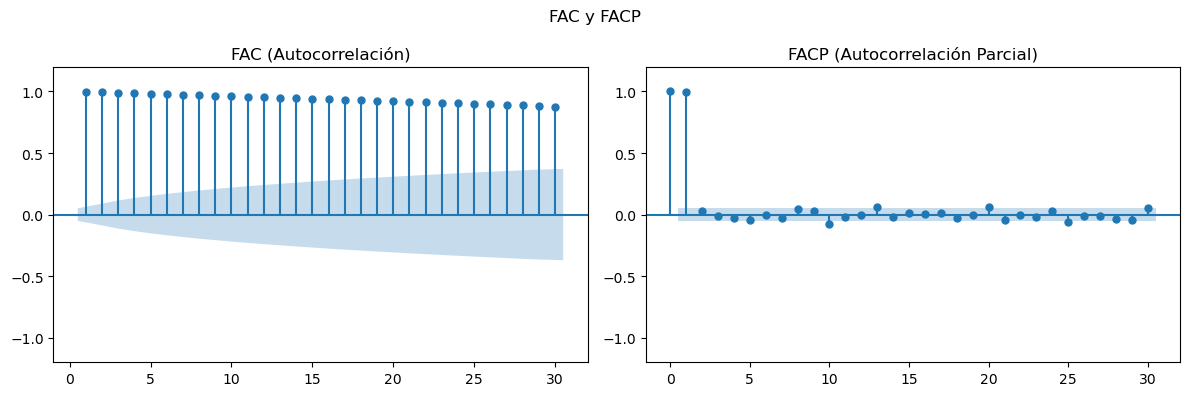

In [203]:
graficar_fac_facp(df_all.loc["2020":"2024"])

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=4)

for i in 9:
    graficar_serie(diferenciar())
    axis[i]

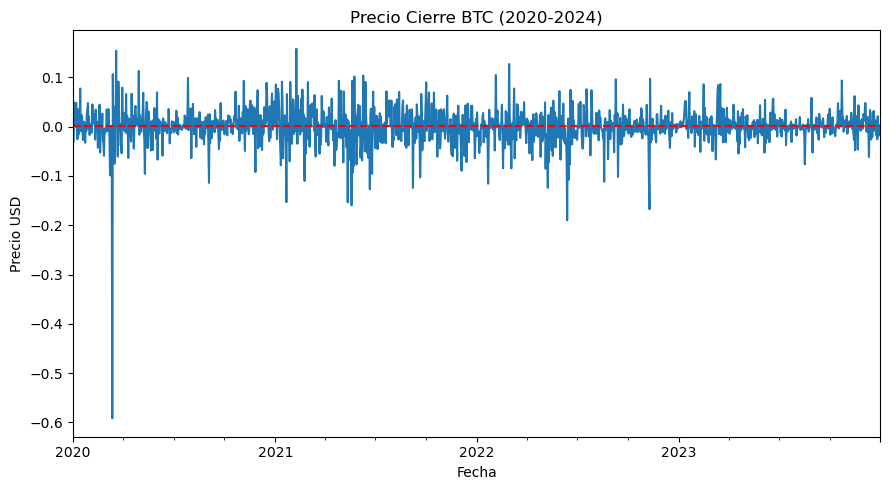

In [193]:
graficar_serie(df.diff()/df)